In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DataSets/spam.csv',encoding='ISO-8859-1')
df = df.iloc[:,:2]
df.rename(columns={"v1":"Target","v2":"Msg"},inplace=True)
df

,Target,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.Target.value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

# Visualization

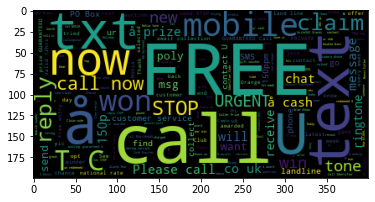

In [4]:
from wordcloud import WordCloud
WC = WordCloud()
WC.generate(" ".join(df[df['Target'] == "spam"]["Msg"]))
plt.imshow(WC)

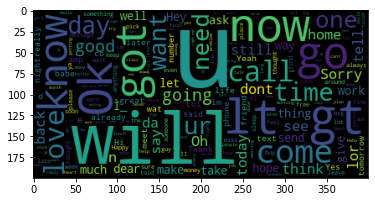

In [5]:
from wordcloud import WordCloud
WC = WordCloud()
WC.generate(" ".join(df[df['Target'] == "ham"]["Msg"]))
plt.imshow(WC)

# Vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()

In [7]:
new_x = CV.fit_transform(df.Msg).toarray()

In [8]:
new_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
Y = df.Target
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5572, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_x,Y,test_size=0.2,random_state=1)

In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
ros_x,ros_y = ros.fit_resample(X_train,Y_train)

In [12]:
pd.Series(ros_y).value_counts()

ham     3849
spam    3849
Name: Target, dtype: int64

# Modelling

In [13]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

def MyModel(model):
    model.fit(ros_x,ros_y)
    Y_pred = model.predict(X_test)
    Report1 = f" Training Score :- {model.score(ros_x,ros_y)}\n"
    Report2 = f" Testing Score :- {model.score(X_test,Y_test)}\n"
    Report3 = classification_report(Y_test,Y_pred)
    return ( model , Report1 , Report2 , Report3 )

In [14]:
m10,m11,m12,m13 = MyModel(GaussianNB())
print(m10,"\n",m11,m12,m13)

GaussianNB() 
  Training Score :- 0.9720706677058977
  Testing Score :- 0.9121076233183857
               precision    recall  f1-score   support

         ham       0.99      0.91      0.95       976
        spam       0.59      0.95      0.73       139

    accuracy                           0.91      1115
   macro avg       0.79      0.93      0.84      1115
weighted avg       0.94      0.91      0.92      1115



In [15]:
m20,m21,m22,m23 = MyModel(MultinomialNB())
print(m20,"\n",m21,m22,m23)

MultinomialNB() 
  Training Score :- 0.990646921278254
  Testing Score :- 0.9811659192825112
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       976
        spam       0.90      0.95      0.93       139

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
m30,m31,m32,m33 = MyModel(BernoulliNB())
print(m30,"\n",m31,m32,m33)

BernoulliNB() 
  Training Score :- 0.986619901273058
  Testing Score :- 0.9946188340807175
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       976
        spam       0.99      0.96      0.98       139

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115



### New Observation

In [17]:
msg1 = "Congratz you have won a tv... call me to get the prize"
msg2 = "sorry sir i will be late today"

In [18]:
def calculate_msg(text):
    text = CV.transform([text]).toarray()
    mnb = MultinomialNB()
    mnb.fit(ros_x,ros_y)
    Y_pred = mnb.predict(text)
    
    return(Y_pred[0])

In [19]:
calculate_msg(msg1)

'spam'

In [20]:
calculate_msg(msg2)

'ham'

# MasterTable

In [21]:
# [ [Heading] , [Training-Score] , [Testing-Score] , [Classification-Report] ]

from IPython.display import display, HTML
def MasterTable(table_data):
    html_table = "<center><table style='border: 2px solid black;'>"
    for row in table_data:
        html_table += "<tr>"
        for column in row:
            html_table += f"<td style='border: 1px solid black;'> <pre>" + str(column) + "</pre></td>"
        html_table += "</tr>"
    html_table += "</table></center>"

    return display(HTML(html_table))

In [22]:
# [ [Heading] , [Training-Score] , [Testing-Score] , [Classification-Report] ]

MasterTable(table_data = [[m10,m20,m30],[m11,m21,m31],[m12,m22,m32],[m13,m23,m33]] )

GaussianNB(),MultinomialNB(),BernoulliNB()
Training Score :- 0.9720706677058977,Training Score :- 0.990646921278254,Training Score :- 0.986619901273058
Testing Score :- 0.9121076233183857,Testing Score :- 0.9811659192825112,Testing Score :- 0.9946188340807175
precision recall f1-score support ham 0.99 0.91 0.95 976 spam 0.59 0.95 0.73 139 accuracy 0.91 1115 macro avg 0.79 0.93 0.84 1115 weighted avg 0.94 0.91 0.92 1115,precision recall f1-score support ham 0.99 0.99 0.99 976 spam 0.90 0.95 0.93 139 accuracy 0.98 1115 macro avg 0.95 0.97 0.96 1115 weighted avg 0.98 0.98 0.98 1115,precision recall f1-score support ham 0.99 1.00 1.00 976 spam 0.99 0.96 0.98 139 accuracy 0.99 1115 macro avg 0.99 0.98 0.99 1115 weighted avg 0.99 0.99 0.99 1115
